<font size="5" color =  black> Plot sgRNA level effect</font>

## 1 Functions and module

### 1.1 Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import math
import seaborn as sns
import re
import scipy.stats as SS
%matplotlib inline 
import copy

In [2]:
pd.set_option('display.max_columns', None)

### 1.2 Functions

----

## 2 Input and output address

In [3]:
data_dir = "data/"

In [4]:
all_data_address  = data_dir + 'BT_all_data_combined.csv'
single_gRNA_address  = data_dir + 'BT_single_position_combined.csv'

---

## 3 Read data

In [5]:
all_data_df = pd.read_csv(all_data_address)

In [6]:
all_data_df['Guide_array'] = all_data_df['Guide1']+'_'+all_data_df['Guide2']+'_'+all_data_df['Guide3']

In [7]:
single_gRNA_df = pd.read_csv(single_gRNA_address)

## 5. Plotting for OncNeg

In [8]:
temp_focal_exp = 'OncNeg'
focal_g = 'Cas12a'

In [9]:
single_gRNA_df1 = single_gRNA_df[(single_gRNA_df.Experiment==temp_focal_exp)&(single_gRNA_df.Mouse_genotype==focal_g)]

In [10]:
all_data_df1 = all_data_df[(all_data_df.Experiment==temp_focal_exp)&(all_data_df.Mouse_genotype==focal_g)]

### 5.1 Single position at a time

<font size="10" color="red"> Fig. 3(e-f)</font>

(0.0, 1.2833240944779116)

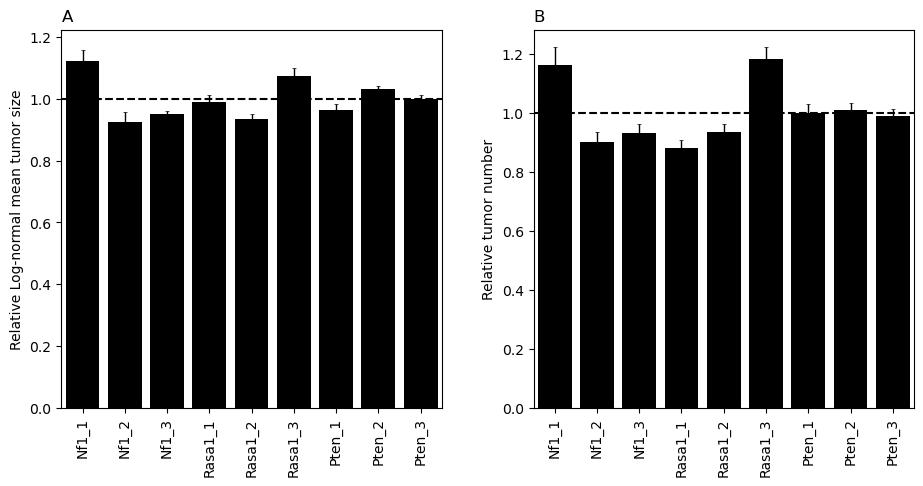

In [11]:
# x label font size 
xlabel_fontsize = 10

# grid specification
input_size = (11,11)
gs = gridspec.GridSpec(11, 11)

# set figure size
fig1 = plt.figure(figsize=input_size)

# set the first panel axis
ax1=fig1.add_subplot(gs[:5, 0:5])
trait_of_interest = 'LN_mean_relative'
ix = 'Guide'
temp_df = single_gRNA_df1.sort_values(by=['Position',ix])
# y label name
temp_y_label_name = 'Relative Log-normal mean tumor size'
temp_x_label_name = 'Target gene'

temp_min_y1 = 0
temp_max_y1 = temp_df[trait_of_interest].max()+0.1


ax1.errorbar(temp_df[ix], temp_df[trait_of_interest], 
             yerr = [temp_df[trait_of_interest]-temp_df[trait_of_interest+'_2.5P'],temp_df[trait_of_interest+'_97.5P']-temp_df[trait_of_interest]], 
             linestyle='', c = 'black', elinewidth=1, ecolor='black', capsize=1.5, capthick=0.5)
sns.barplot(x=temp_df[ix], y=temp_df[trait_of_interest], data=temp_df, ax = ax1,  color='Black',dodge=False)
# add control axis
ax1.axhline(y=1,color='black', linestyle='--')
# manipulate axes scale, label and tick
# set x,y axis label
ax1.set_xlabel(None)
ax1.set_ylabel(temp_y_label_name)
# Rotate x ticklabel orientation
ax1.tick_params(axis='x', labelrotation = 90)

ax1.set_title('A', loc ='Left')
ax1.set_ylim(temp_min_y1,temp_max_y1)

###
ax1=fig1.add_subplot(gs[:5, 6:11])
trait_of_interest = 'TTN_normalized_relative'
ix = 'Guide'
temp_df = single_gRNA_df1.sort_values(by=['Position',ix])
# y label name
temp_y_label_name = 'Relative tumor number'
temp_x_label_name = 'Target gene'

temp_min_y2 = 0
temp_max_y2 = temp_df[trait_of_interest].max()+0.1

ax1.errorbar(temp_df[ix], temp_df[trait_of_interest], 
             yerr = [temp_df[trait_of_interest]-temp_df[trait_of_interest+'_2.5P'],temp_df[trait_of_interest+'_97.5P']-temp_df[trait_of_interest]], 
             linestyle='', c = 'black', elinewidth=1, ecolor='black', capsize=1.5, capthick=0.5)
sns.barplot(x=temp_df[ix], y=temp_df[trait_of_interest], data=temp_df, ax = ax1,  color='Black',dodge=False)
# add control axis
ax1.axhline(y=1,color='black', linestyle='--')
# manipulate axes scale, label and tick
# set x,y axis label
ax1.set_xlabel(None)
ax1.set_ylabel(temp_y_label_name)
# Rotate x ticklabel orientation
ax1.tick_params(axis='x', labelrotation = 90)
 
ax1.set_title('B', loc ='Left')
ax1.set_ylim(temp_min_y2,temp_max_y2)
#################################################

### 5.2 All data together

<font size="10" color="red"> Fig. S2(e-f)</font>

In [12]:
# Define the number of colors you want to cycle through
num_colors = 3

# Define a custom color palette
palette = sns.color_palette("husl", num_colors)

(0.0, 1.7072253867322693)

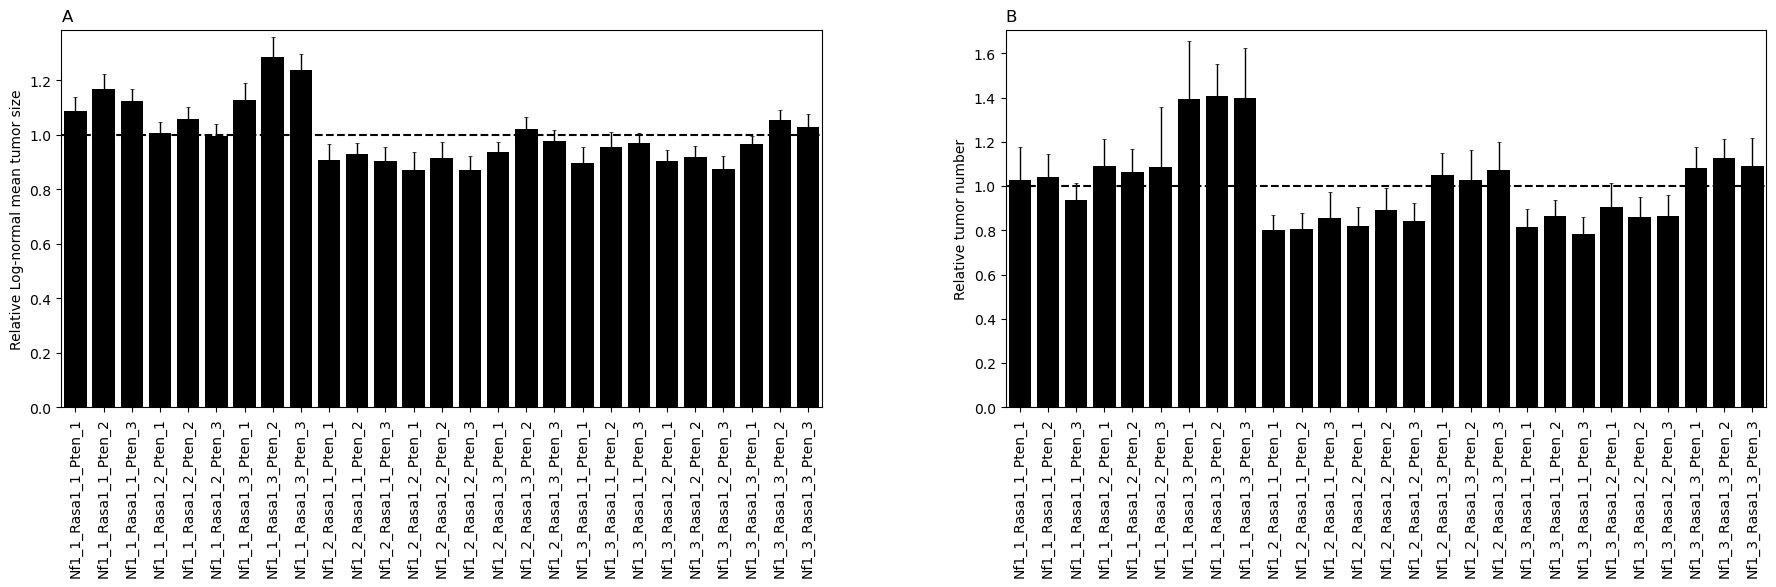

In [13]:
# x label font size 
xlabel_fontsize = 10

# grid specification
input_size = (22,11)
gs = gridspec.GridSpec(11, 11)

# set figure size
fig1 = plt.figure(figsize=input_size)

# set the first panel axis
ax1=fig1.add_subplot(gs[:5, 0:5])
trait_of_interest = 'LN_mean_relative'
ix = 'Guide_array'
temp_df = all_data_df1.sort_values(by=[ix])
# y label name
temp_y_label_name = 'Relative Log-normal mean tumor size'
temp_x_label_name = 'Target gene'

temp_min_y1 = 0
temp_max_y1 = temp_df[trait_of_interest].max()+0.1


ax1.errorbar(temp_df[ix], temp_df[trait_of_interest], 
             yerr = [temp_df[trait_of_interest]-temp_df[trait_of_interest+'_2.5P'],temp_df[trait_of_interest+'_97.5P']-temp_df[trait_of_interest]], 
             linestyle='', c = 'black', elinewidth=1, ecolor='black', capsize=1.5, capthick=0.5)
sns.barplot(x=temp_df[ix], y=temp_df[trait_of_interest], data=temp_df, ax = ax1,color='Black')
# add control axis
ax1.axhline(y=1,color='black', linestyle='--')
# manipulate axes scale, label and tick
# set x,y axis label
ax1.set_xlabel(None)
ax1.set_ylabel(temp_y_label_name)
# Rotate x ticklabel orientation
ax1.tick_params(axis='x', labelrotation = 90)
 
ax1.set_title('A', loc ='Left')
ax1.set_ylim(temp_min_y1,temp_max_y1)

###
ax1=fig1.add_subplot(gs[:5, 6:11])
trait_of_interest = 'TTN_normalized_relative'
ix = 'Guide_array'
temp_df = all_data_df1.sort_values(by=[ix])
# y label name
temp_y_label_name = 'Relative tumor number'
temp_x_label_name = 'Target gene'

temp_min_y2 = 0
temp_max_y2 = temp_df[trait_of_interest].max()+0.3

ax1.errorbar(temp_df[ix], temp_df[trait_of_interest], 
             yerr = [temp_df[trait_of_interest]-temp_df[trait_of_interest+'_2.5P'],temp_df[trait_of_interest+'_97.5P']-temp_df[trait_of_interest]], 
             linestyle='', c = 'black', elinewidth=1, ecolor='black', capsize=1.5, capthick=0.5)
sns.barplot(x=temp_df[ix], y=temp_df[trait_of_interest], data=temp_df, ax = ax1,color='Black')
# add control axis
ax1.axhline(y=1,color='black', linestyle='--')
# manipulate axes scale, label and tick
# set x,y axis label
ax1.set_xlabel(None)
ax1.set_ylabel(temp_y_label_name)
# Rotate x ticklabel orientation
ax1.tick_params(axis='x', labelrotation = 90)
 
ax1.set_title('B', loc ='Left')
ax1.set_ylim(temp_min_y2,temp_max_y2)
#################################################

---

## 6. Plotting for SCLC

In [14]:
temp_focal_exp = 'SCLC'
focal_g = 'Cas12a'
single_gRNA_df1 = single_gRNA_df[(single_gRNA_df.Experiment==temp_focal_exp)&(single_gRNA_df.Mouse_genotype==focal_g)]
all_data_df1 = all_data_df[(all_data_df.Experiment==temp_focal_exp)&(all_data_df.Mouse_genotype==focal_g)]

### 6.1 Single position at a time

<font size="10" color="red"> Fig. 4(h-i)</font>

(0.0, 1.4753194347925573)

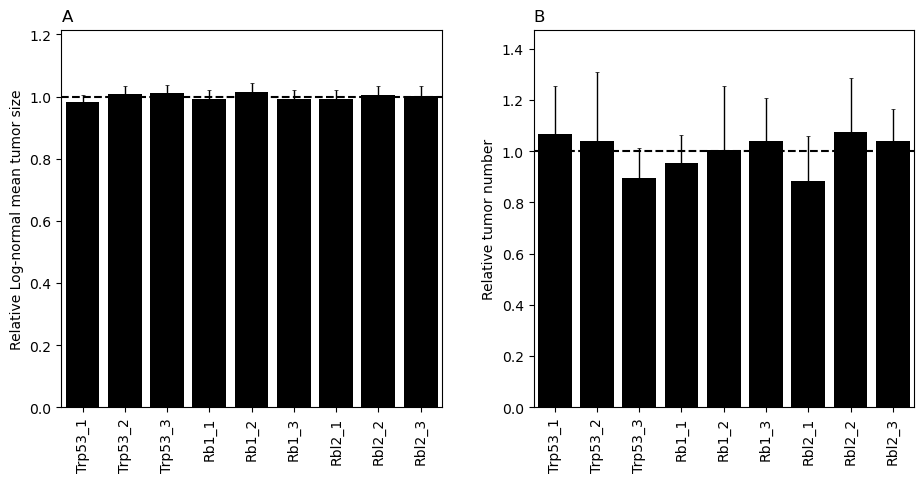

In [15]:
# x label font size 
xlabel_fontsize = 10

# grid specification
input_size = (11,11)
gs = gridspec.GridSpec(11, 11)

# set figure size
fig1 = plt.figure(figsize=input_size)

# set the first panel axis
ax1=fig1.add_subplot(gs[:5, 0:5])
trait_of_interest = 'LN_mean_relative'
ix = 'Guide'
temp_df = single_gRNA_df1.sort_values(by=['Position',ix])
# y label name
temp_y_label_name = 'Relative Log-normal mean tumor size'
temp_x_label_name = 'Target gene'

temp_min_y1 = 0
temp_max_y1 = temp_df[trait_of_interest].max()+0.2


ax1.errorbar(temp_df[ix], temp_df[trait_of_interest], 
             yerr = [temp_df[trait_of_interest]-temp_df[trait_of_interest+'_2.5P'],temp_df[trait_of_interest+'_97.5P']-temp_df[trait_of_interest]], 
             linestyle='', c = 'black', elinewidth=1, ecolor='black', capsize=1.5, capthick=0.5)
sns.barplot(x=temp_df[ix], y=temp_df[trait_of_interest], data=temp_df, ax = ax1, color='Black',dodge=False)
# add control axis
ax1.axhline(y=1,color='black', linestyle='--')
# manipulate axes scale, label and tick
# set x,y axis label
ax1.set_xlabel(None)
ax1.set_ylabel(temp_y_label_name)
# Rotate x ticklabel orientation
ax1.tick_params(axis='x', labelrotation = 90)
 
ax1.set_title('A', loc ='Left')
ax1.set_ylim(temp_min_y1,temp_max_y1)

###
ax1=fig1.add_subplot(gs[:5, 6:11])
trait_of_interest = 'TTN_normalized_relative'
ix = 'Guide'
temp_df = single_gRNA_df1.sort_values(by=['Position',ix])
# y label name
temp_y_label_name = 'Relative tumor number'
temp_x_label_name = 'Target gene'

temp_min_y2 = 0
temp_max_y2 = temp_df[trait_of_interest].max()+0.4

ax1.errorbar(temp_df[ix], temp_df[trait_of_interest], 
             yerr = [temp_df[trait_of_interest]-temp_df[trait_of_interest+'_2.5P'],temp_df[trait_of_interest+'_97.5P']-temp_df[trait_of_interest]], 
             linestyle='', c = 'black', elinewidth=1, ecolor='black', capsize=1.5, capthick=0.5)
sns.barplot(x=temp_df[ix], y=temp_df[trait_of_interest], data=temp_df, ax = ax1, color='Black',dodge=False)
# add control axis
ax1.axhline(y=1,color='black', linestyle='--')
# manipulate axes scale, label and tick
# set x,y axis label
ax1.set_xlabel(None)
ax1.set_ylabel(temp_y_label_name)
# Rotate x ticklabel orientation
ax1.tick_params(axis='x', labelrotation = 90)
 
ax1.set_title('B', loc ='Left')
ax1.set_ylim(temp_min_y2,temp_max_y2)


---

## 7. Plotting for PDAC

In [16]:
temp_focal_exp = 'PDAC'
focal_g = 'Cas12a'
single_gRNA_df1 = single_gRNA_df[(single_gRNA_df.Experiment==temp_focal_exp)&(single_gRNA_df.Mouse_genotype==focal_g)]
all_data_df1 = all_data_df[(all_data_df.Experiment==temp_focal_exp)&(all_data_df.Mouse_genotype==focal_g)]

### 7.1 Single position at a time

<font size="10" color="red"> Fig. 5(i) and S3(e)</font>

(0.0, 2.227776521149061)

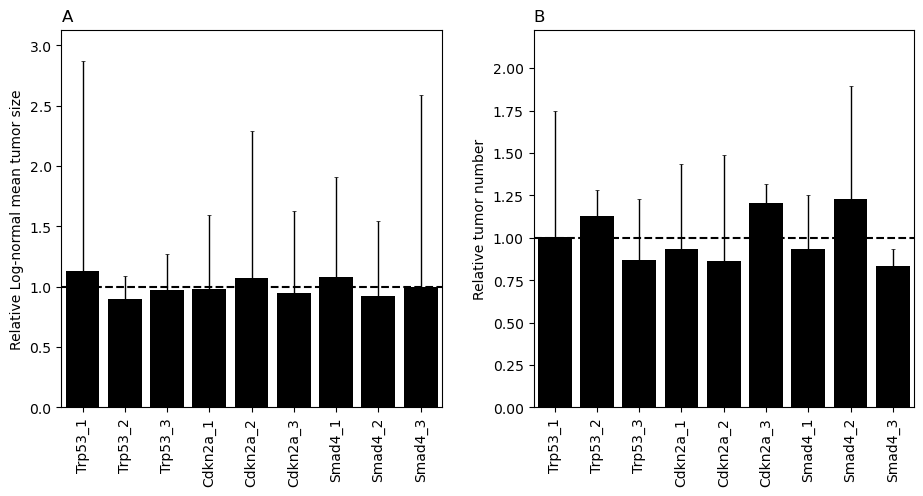

In [18]:
# x label font size 
xlabel_fontsize = 10

# grid specification
input_size = (11,11)
gs = gridspec.GridSpec(11, 11)

# set figure size
fig1 = plt.figure(figsize=input_size)

# set the first panel axis
ax1=fig1.add_subplot(gs[:5, 0:5])
trait_of_interest = 'LN_mean_relative'
ix = 'Guide'
temp_df = single_gRNA_df1.sort_values(by=['Position',ix])
# y label name
temp_y_label_name = 'Relative Log-normal mean tumor size'
temp_x_label_name = 'Target gene'

temp_min_y1 = 0
temp_max_y1 = temp_df[trait_of_interest].max()+2


ax1.errorbar(temp_df[ix], temp_df[trait_of_interest], 
             yerr = [temp_df[trait_of_interest]-temp_df[trait_of_interest+'_2.5P'],temp_df[trait_of_interest+'_97.5P']-temp_df[trait_of_interest]], 
             linestyle='', c = 'black', elinewidth=1, ecolor='black', capsize=1.5, capthick=0.5)
sns.barplot(x=temp_df[ix], y=temp_df[trait_of_interest], data=temp_df, ax = ax1, color='Black',dodge=False)
# add control axis
ax1.axhline(y=1,color='black', linestyle='--')
# manipulate axes scale, label and tick
# set x,y axis label
ax1.set_xlabel(None)
ax1.set_ylabel(temp_y_label_name)
# Rotate x ticklabel orientation
ax1.tick_params(axis='x', labelrotation = 90)
 
ax1.set_title('A', loc ='Left')
ax1.set_ylim(temp_min_y1,temp_max_y1)

###
ax1=fig1.add_subplot(gs[:5, 6:11])
trait_of_interest = 'TTN_normalized_relative'
ix = 'Guide'
temp_df = single_gRNA_df1.sort_values(by=['Position',ix])
# y label name
temp_y_label_name = 'Relative tumor number'
temp_x_label_name = 'Target gene'

temp_min_y2 = 0
temp_max_y2 = temp_df[trait_of_interest].max()+1

ax1.errorbar(temp_df[ix], temp_df[trait_of_interest], 
             yerr = [temp_df[trait_of_interest]-temp_df[trait_of_interest+'_2.5P'],temp_df[trait_of_interest+'_97.5P']-temp_df[trait_of_interest]], 
             linestyle='', c = 'black', elinewidth=1, ecolor='black', capsize=1.5, capthick=0.5)
sns.barplot(x=temp_df[ix], y=temp_df[trait_of_interest], data=temp_df, ax = ax1, color='Black',dodge=False)
# add control axis
ax1.axhline(y=1,color='black', linestyle='--')
# manipulate axes scale, label and tick
# set x,y axis label
ax1.set_xlabel(None)
ax1.set_ylabel(temp_y_label_name)
# Rotate x ticklabel orientation
ax1.tick_params(axis='x', labelrotation = 90)
 
ax1.set_title('B', loc ='Left')
ax1.set_ylim(temp_min_y2,temp_max_y2)